In [9]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set(style = 'whitegrid')
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
%matplotlib inline
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston = pd.read_csv('housing.csv', delimiter=r"\s+", names = columns)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:

print("The Boston housing Price Prediction Dataset has")
print("\t\tNumber of Factors : \t", boston.shape[1] - 1)
print("\t\tNumber of Samples : \t", boston.shape[0])

The Boston housing Price Prediction Dataset has
		Number of Factors : 	 13
		Number of Samples : 	 506


In [12]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

<ipython-input-14-add4f46bc084>:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(8, 6))


<Figure size 576x432 with 0 Axes>

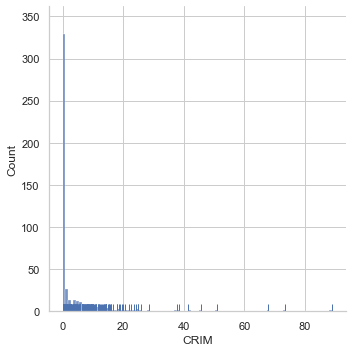

<Figure size 576x432 with 0 Axes>

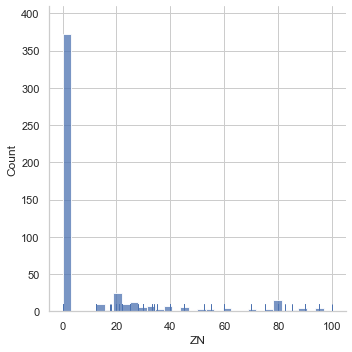

<Figure size 576x432 with 0 Axes>

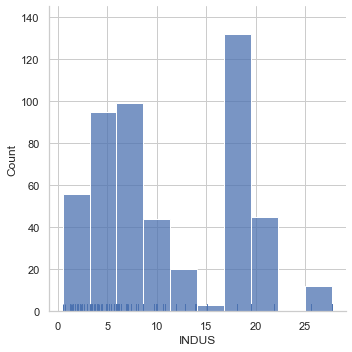

<Figure size 576x432 with 0 Axes>

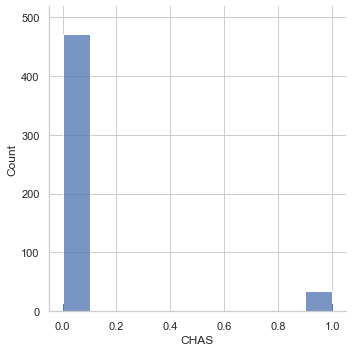

<Figure size 576x432 with 0 Axes>

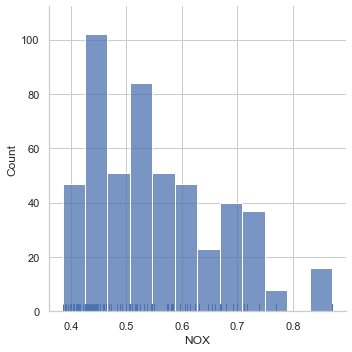

<Figure size 576x432 with 0 Axes>

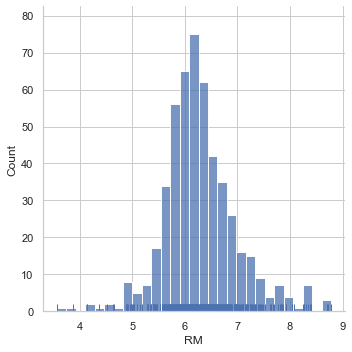

<Figure size 576x432 with 0 Axes>

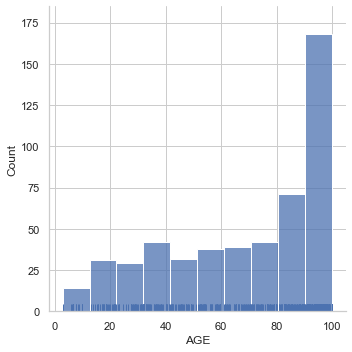

<Figure size 576x432 with 0 Axes>

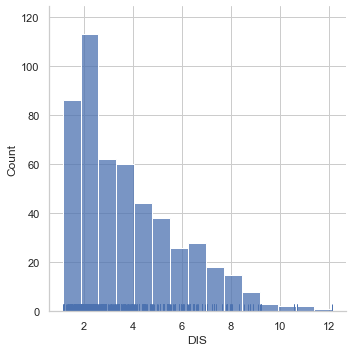

<Figure size 576x432 with 0 Axes>

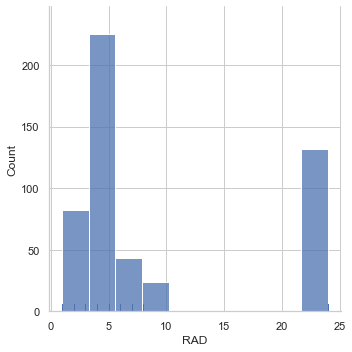

<Figure size 576x432 with 0 Axes>

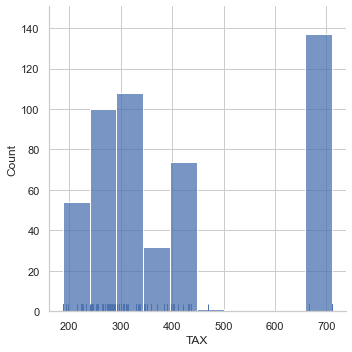

<Figure size 576x432 with 0 Axes>

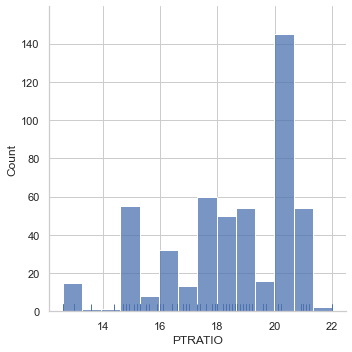

<Figure size 576x432 with 0 Axes>

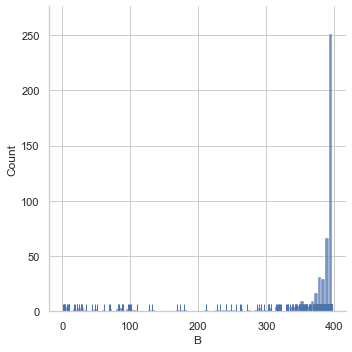

<Figure size 576x432 with 0 Axes>

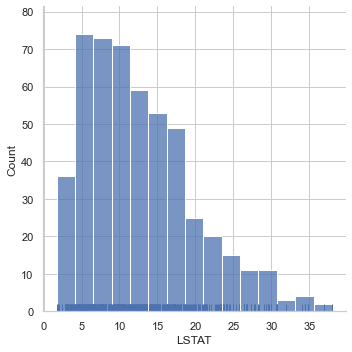

<Figure size 576x432 with 0 Axes>

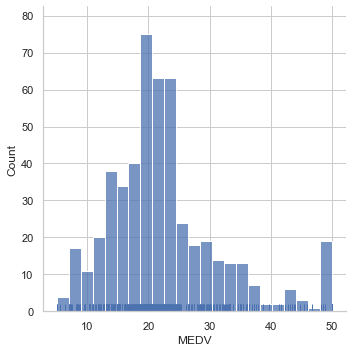

In [14]:
plt.figure(figsize=(8, 6))
sb.displot(boston['CRIM'], rug = True)
plt.savefig('crim.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['ZN'], rug = True)
plt.savefig('zn.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['INDUS'], rug = True)
plt.savefig('indus.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['CHAS'], rug = True)
plt.savefig('chas.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['NOX'], rug = True)
plt.savefig('nox.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['RM'], rug = True)
plt.savefig('rm.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['AGE'], rug = True)
plt.savefig('age.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['DIS'], rug = True)
plt.savefig('dis.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['RAD'], rug = True)
plt.savefig('rad.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['TAX'], rug = True)
plt.savefig('tax.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['PTRATIO'], rug = True)
plt.savefig('ptration.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['B'], rug = True)
plt.savefig('b.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['LSTAT'], rug = True)
plt.savefig('lstat.png')

plt.figure(figsize=(8, 6))
sb.displot(boston['MEDV'], rug = True)
plt.savefig('medv.png')

<Figure size 144x144 with 0 Axes>

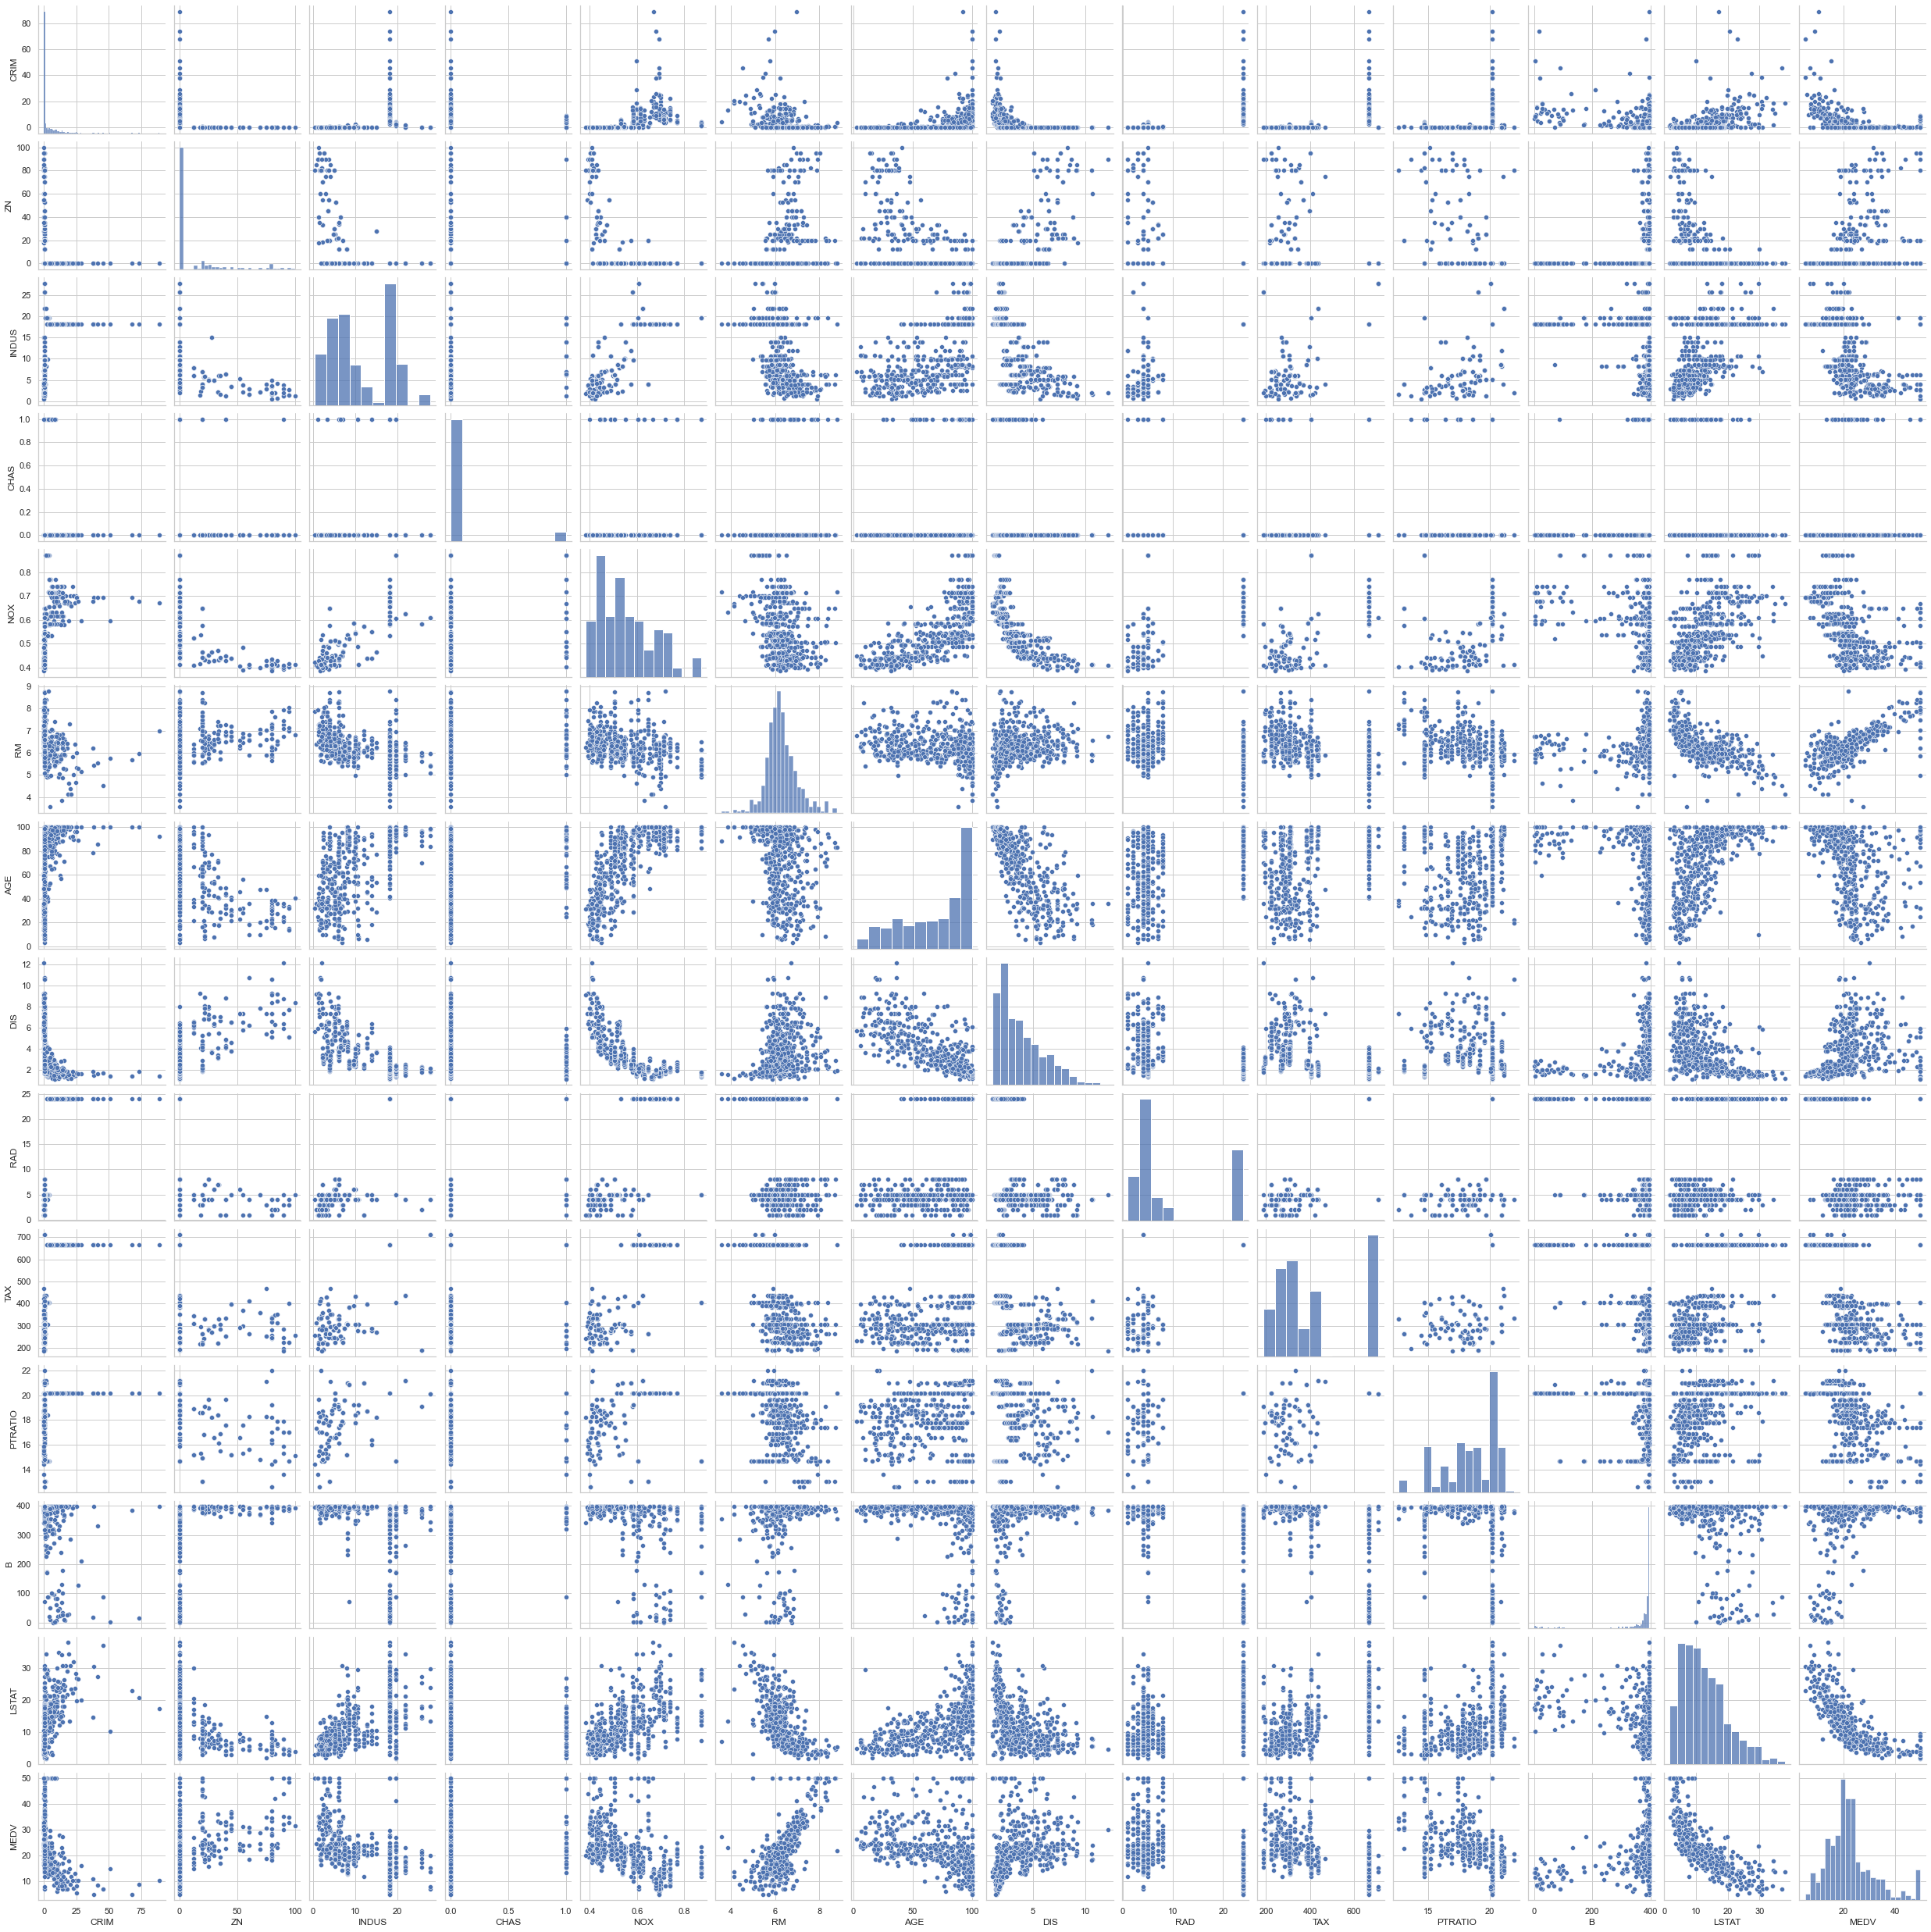

In [16]:
plt.figure(figsize  = (2, 2))
sb.pairplot(boston)
plt.savefig('pairplot.png')

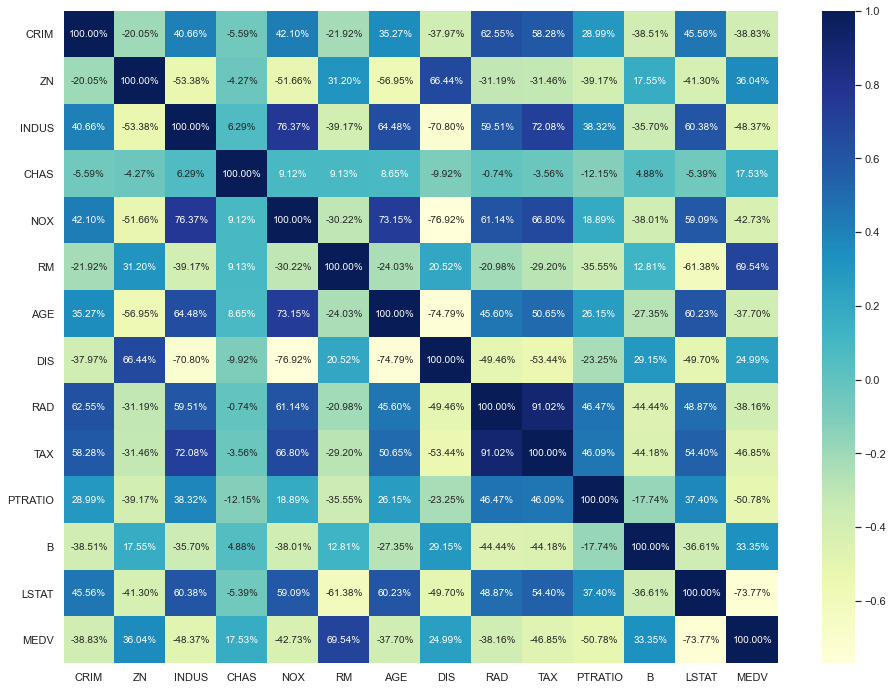

In [17]:
# TODO : Visualizing Feature Correlation
plt.figure(figsize = (16, 12))
sb.heatmap(boston.corr(), cmap = 'YlGnBu', annot = True, fmt = '.2%')
plt.savefig('features_correlation.png')

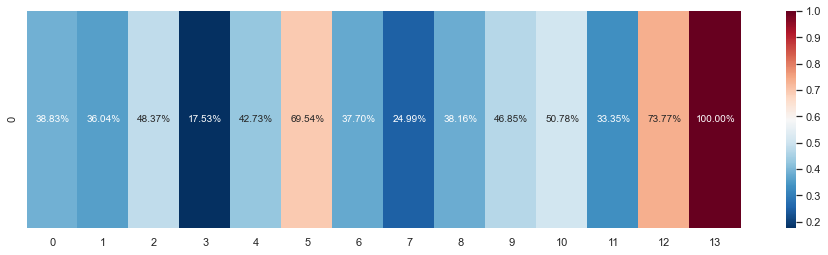

In [18]:
# TODO : Visualizing correlation of features with prediction column `MEDV`

corr_with_medv = boston.corrwith(boston['MEDV'])

plt.figure(figsize = (16, 4))
sb.heatmap([np.abs(corr_with_medv)], cmap = 'RdBu_r', annot = True, fmt = '.2%')
plt.savefig('correlation_with_price.png')

In [21]:

corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

In [22]:

y = boston['MEDV'].values
from sklearn.ensemble import ExtraTreesRegressor
etc = ExtraTreesRegressor()
etc.fit(boston.iloc[:, :-1].values, y)

print("Percentage Importance of each features with respect to House Price : ")
important_features = pd.Series(etc.feature_importances_*100, index = boston.columns[:-1])
important_features

Percentage Importance of each features with respect to House Price : 


CRIM        2.710705
ZN          0.654762
INDUS       2.891475
CHAS        1.349886
NOX         4.911936
RM         29.598415
AGE         2.038130
DIS         3.133369
RAD         2.017394
TAX         4.195130
PTRATIO     5.292757
B           1.795156
LSTAT      39.410886
dtype: float64

In [23]:

important_features.sort_values(ascending = False)

LSTAT      39.410886
RM         29.598415
PTRATIO     5.292757
NOX         4.911936
TAX         4.195130
DIS         3.133369
INDUS       2.891475
CRIM        2.710705
AGE         2.038130
RAD         2.017394
B           1.795156
CHAS        1.349886
ZN          0.654762
dtype: float64

In [24]:

corr_with_medv[:-1].abs().sort_values(ascending = False)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
dtype: float64

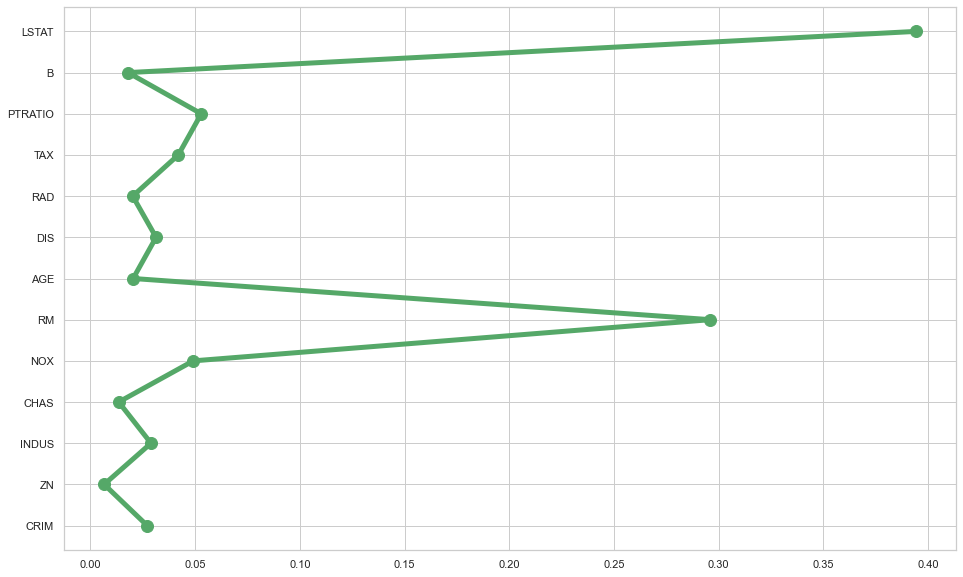

In [25]:
plt.figure(figsize=(16, 10))
plt.plot(etc.feature_importances_, boston.columns[:-1], 'go-', linewidth=5, markersize=12)
plt.savefig('feature_importances.png')

In [26]:

features_arranged_on_importance = important_features.sort_values(ascending = False).index
features_arranged_on_importance

Index(['LSTAT', 'RM', 'PTRATIO', 'NOX', 'TAX', 'DIS', 'INDUS', 'CRIM', 'AGE',
       'RAD', 'B', 'CHAS', 'ZN'],
      dtype='object')

In [27]:
y = boston.loc[:, 'MEDV'].values

In [28]:

new_boston = boston[features_arranged_on_importance]
new_boston.head()

,LSTAT,RM,PTRATIO,NOX,TAX,DIS,INDUS,CRIM,AGE,RAD,B,CHAS,ZN
0,4.98,6.575,15.3,0.538,296.0,4.0900,2.31,0.00632,65.2,1,396.90,0,18.0
1,9.14,6.421,17.8,0.469,242.0,4.9671,7.07,0.02731,78.9,2,396.90,0,0.0
2,4.03,7.185,17.8,0.469,242.0,4.9671,7.07,0.02729,61.1,2,392.83,0,0.0
3,2.94,6.998,18.7,0.458,222.0,6.0622,2.18,0.03237,45.8,3,394.63,0,0.0
4,5.33,7.147,18.7,0.458,222.0,6.0622,2.18,0.06905,54.2,3,396.90,0,0.0


In [29]:

X = new_boston.values
X = X[:, :6]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)


In [30]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.717888129255216
Testing Score  :  0.6518069263940918
R2 Score :  0.6518069263940918
MSE :  25.534315357742045


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

linear_model = make_pipeline(MinMaxScaler(), LinearRegression())
linear_model.fit(X_train, y_train)

print('Training Score : ', linear_model.score(X_train, y_train))
print('Testing Score  : ', linear_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, linear_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, linear_model.predict(X_test)))

Training Score :  0.717888129255216
Testing Score  :  0.6518069263940925
R2 Score :  0.6518069263940925
MSE :  25.53431535774199


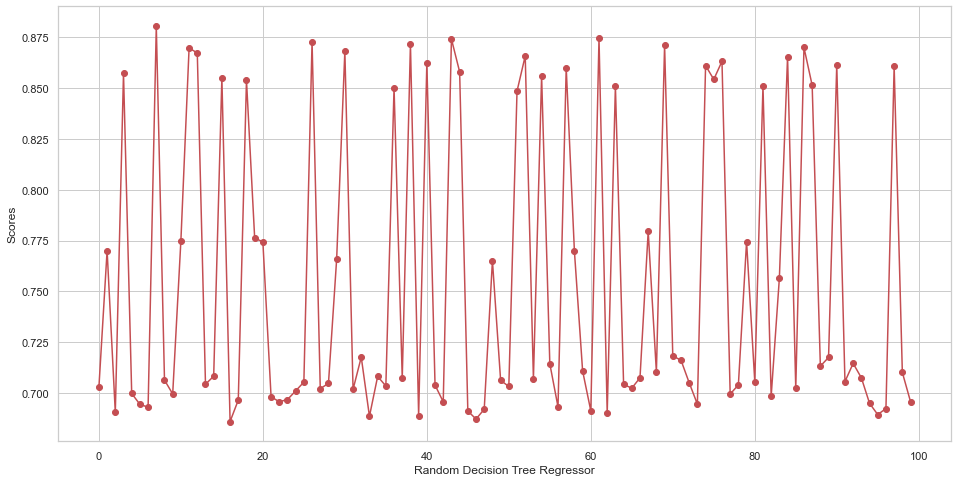

In [32]:
from sklearn.tree import DecisionTreeRegressor
scores = []
for i in range(100):

    dtr_model = DecisionTreeRegressor(max_depth=None, random_state=i)
    dtr_model.fit(X_train, y_train)
    scores.append(r2_score(y_test, dtr_model.predict(X_test)))

plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Random Decision Tree Regressor')
plt.ylabel('Scores')
plt.savefig('random_decision_tree_regressor.png')
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

dtr_model = DecisionTreeRegressor(max_depth=23, random_state=3)
dtr_model.fit(X_train[:, :], y_train)
    

print('Training Score : ', dtr_model.score(X_train, y_train))
print('Testing Score  : ', dtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, dtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, dtr_model.predict(X_test)))


Training Score :  1.0
Testing Score  :  0.8572856347688336
R2 Score :  0.8572856347688336
MSE :  10.46578431372549


In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
adtr_model = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth = 12, random_state = 92))
adtr_model.fit(X_train, y_train)

print('Training Score : ', adtr_model.score(X_train, y_train))
print('Testing Score  : ', adtr_model.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, adtr_model.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, adtr_model.predict(X_test)))

Training Score :  0.9979510357777289
Testing Score  :  0.6938943386635792
R2 Score :  0.6938943386635792
MSE :  22.447886192592343


In [35]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
rfr = RandomForestRegressor(max_depth = 7, random_state = 63)
rfr.fit(X_train, y_train)


print('Training Score : ', rfr.score(X_train, y_train))
print('Testing Score  : ', rfr.score(X_test, y_test))

print('R2 Score : ', r2_score(y_test, rfr.predict(X_test)))
print('MSE : ', mean_squared_error(y_test, rfr.predict(X_test)))

Training Score :  0.9589426518050381
Testing Score  :  0.8902341545719658
R2 Score :  0.8902341545719658
MSE :  8.049544707028991


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

print('Linear Regression : ')
model1 = LinearRegression()
model1.fit(X_train, y_train)
print('Score : ', model1.score(X_test, y_test))

print('Decision Tree Regression : ')
model2 = DecisionTreeRegressor(max_depth=23, random_state=3)
model2.fit(X_train, y_train)
print('Score : ', model2.score(X_test, y_test))

print('Random Forest Regression : ')
model3 = RandomForestRegressor(max_depth = 7, random_state = 63)
model3.fit(X_train, y_train)
print('Score : ', model3.score(X_test, y_test))

print('k Neighbors Regression : ')
model4 = KNeighborsRegressor(n_neighbors = 10)
model4.fit(X_train, y_train)
print('Score : ', model4.score(X_test, y_test))

Linear Regression : 
Score :  0.6518069263940918
Decision Tree Regression : 
Score :  0.8572856347688336
Random Forest Regression : 
Score :  0.8902341545719658
k Neighbors Regression : 
Score :  0.5920957373806609


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[:, :], y, test_size = 0.20, random_state = 46)

print('Random Forest Regression : ')
random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
random_forest_regressor.fit(X_train, y_train)
print('Score : ', random_forest_regressor.score(X, y))

In [ ]:
# Scores for different training samples
scores = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = i)
    random_forest_regressor = RandomForestRegressor(max_depth = 7, random_state = 63)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'go-')
plt.xlabel('Different Training Samples')
plt.ylabel('Scores')
plt.savefig('random_forest_diff_train_samples.png')
plt.show()

In [ ]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(100):
    random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = i)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(100)), scores, 'ro-')
plt.xlabel('Different Random Forest Models')
plt.ylabel('Scores')
plt.savefig('random_forest_diff_RF_models.png')
plt.show()

In [ ]:
# Scores for different random forest model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)

scores = []
for i in range(1, 30):
    random_forest_regressor = RandomForestRegressor(max_depth = i, random_state = 68)
    random_forest_regressor.fit(X_train, y_train)
    scores.append(random_forest_regressor.score(X, y))
    
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.xlabel('Different Max_depths')
plt.ylabel('Scores')
plt.savefig('random_forest_diff_max_depth.png')
plt.show()

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(list(range(1, 30)), scores, 'bo-')
plt.ylim(0.95, 0.97)
plt.show()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 3)
random_forest_regressor = RandomForestRegressor(max_depth = 13, random_state = 68)
random_forest_regressor.fit(X_train, y_train)

In [ ]:
random_forest_regressor.score(X, y)

In [ ]:
print('Training Accuracy : ', random_forest_regressor.score(X_train, y_train))
print('Testing Accuracy  : ', random_forest_regressor.score(X_test, y_test))

In [ ]:
print('Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test)))
print('Root Mean Squared Error : ', mean_squared_error(y_test, random_forest_regressor.predict(X_test))**0.5)
print('Score : ', r2_score(y, random_forest_regressor.predict(X)))